# Partial Least Squares Regression (PLS)

#### It is based on idea that creating a regression model by reducing variables into fewer components that do not have multicollinearity.

## Theory

<br>

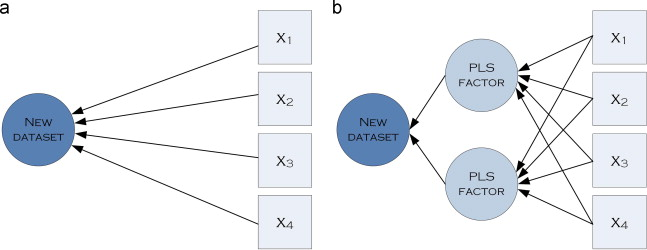

<br>

#### PCR vs PLS:
* With PCR, components are created to summarize variability of independent variables.
* With PLS, components are created to summarize covariant between components and dependent variables.
* PLS can be called as supervised dimensional reduction procedure and PCR can be called as unsupervised dimensional reduction procedure

## Model

In [5]:
import pandas as pd

In [8]:
from sklearn.model_selection import train_test_split

In [18]:
hit = pd.read_csv("../../Datasets/Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype("float64")
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [19]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD

In [40]:
pls_model = PLSRegression(n_components=2).fit(X_train, y_train)

In [41]:
pls_model.coef_

array([[ 35.55683711],
       [ 49.88117076],
       [ 19.9987271 ],
       [ 39.61379254],
       [ 35.29767479],
       [ 37.72592797],
       [ 15.58212111],
       [ 28.32171536],
       [ 34.05640027],
       [ 28.12929112],
       [ 33.67521263],
       [ 35.00122884],
       [ 21.13643183],
       [ 55.31781867],
       [  0.38865637],
       [ -4.00571112],
       [ 14.1049028 ],
       [-42.39221599],
       [ 11.27670698]])

## Prediction

In [45]:
pls_model.predict(X_train)[:10]

array([[ 304.00228015],
       [ 263.57693742],
       [ 758.44187937],
       [ 567.22736094],
       [ 730.44640271],
       [  62.79431907],
       [1262.58951399],
       [1366.31610395],
       [ 582.41708824],
       [ 778.42049866]])

In [47]:
y_pred = pls_model.predict(X_train)

In [48]:
import numpy as np

In [56]:
from sklearn.metrics import mean_squared_error, r2_score

In [57]:
np.sqrt(mean_squared_error(y_train, y_pred))

315.2221554406519

In [58]:
r2_score(y_train, y_pred)

0.5221795681330405